In [56]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

g, m , rho, Vb, veq = sp.symbols('g m rho V_b V_eq')

v, vc, y, ym, th, th1, th2, B, p, a, b, e, gamma = sp.symbols('v v_c y y_m theta theta_1 theta_2 B p a b e gamma')
u, uc, zeta, omega = sp.symbols('u u_c zeta omega')

In [37]:
#B =2*g*(m-rho*Vb)/(m*v_eq)
y_u = B*u/(p**2+p*B)
ym_uc = omega*uc/(p**2+zeta*p+omega)

u_u = th*(y-uc)

uc_y = (p**2+p*B-B*th)*y/(-B*th)
y_uc = -B*th*uc/(p**2+p*B-B*th)
error = y_uc - ym


In [59]:
sp.Eq(u, u_u)

Eq(u, theta*(-u_c + y))

In [60]:
sp.Eq(ym,ym_uc)

Eq(y_m, omega*u_c/(omega + p**2 + p*zeta))

In [62]:
sp.Eq(y, y_u)

Eq(y, B*u/(B*p + p**2))

In [61]:
sp.Eq(y, y_uc)

Eq(y, -B*theta*u_c/(B*p - B*theta + p**2))

In [38]:
de_dth = sp.diff(error, th).simplify()
de_dth

-B*p*u_c*(B + p)/(B*p - B*theta + p**2)**2

In [40]:
de_dth_y = de_dth.subs(uc, uc_y).simplify()
de_dth_y

p*y*(B + p)/(theta*(B*p - B*theta + p**2))

In [41]:
theta_dot = (-gamma*e*de_dth_y).simplify()
theta_dot

-e*gamma*p*y*(B + p)/(theta*(B*p - B*theta + p**2))

In [3]:
#from dynamics of system, all units SI
g = 9.8
m = 1
rho = 1
Vb = 1
v_eq = 1
B = 2*g*(m-rho*Vb)/(m*v_eq)

#model variables OMEGA and ZETA
#OMEGA can be set to whatever
#if model following B = ZETA
OMEGA = 1
ZETA = B

#duration of timestep
ts = 0.1
GAMMA = 1

def MRAS_Control(theta_i, theta_p1_i, theta_p2_i,
                u_i, uc_i, y_i, y_p1_i, y_p2_i,
                ym_i, ym_p1_i):
    
    u_o = theta_i*(y_i-uc_i)
    
    ym_p2_o = OMEGA*uc_i - ZETA*ym_p1_i - OMEGA*ym_i
    ym_p1_o = ym_p1_i + ts*ym_p2_o
    ym_o = ym_i + ts*ym_p1_o
    
    error = y_i - ym_o
    
    theta_p3_o = -(GAMMA*error/theta_i)*(B*y_p1_i+y_p2_i) - B*theta_p2_i + B*theta_i*theta_p1_i
    theta_p2_o = theta_p2_i + ts*theta_p3_o
    theta_p1_o = theta_p1_i + ts*theta_p2_o
    theta_o = theta_i + ts*theta_p1_o
    
    result_dict = {
                   "ym_p1": ym_p1_o,
                   "ym": ym_o,
                   "u_o":u_o,
                   "theta_p2": theta_p2_o,
                   "theta_p1": theta_p1_o,
                   "theta": theta_o
                  }
    return result_dict

#initial conditions
theta_i = 0.1
theta_p1_i = 0
theta_p2_i = 0
u_i = 0
ym_i = 0
ym_p1_i = 0
#y_i, y_p1_i and y_p2_i are measured

#control input
uc_i = 0.5

#main loop
test_val = True
while test_val == True:
    #these would be measured from the system
    y_i = 0
    y_p1_i = 0
    y_p2_i = 0
    
    MRAS_Values = MRAS_Control(theta_i, theta_p1_i, theta_p2_i,
                u_i, uc_i, y_i, y_p1_i, y_p2_i,
                ym_i, ym_p1_i)
    
    #overrite initial condititions in next time step
    theta_i = MRAS_Values["theta"]
    theta_p1_i = MRAS_Values["theta_p1"]
    theta_p2_i = MRAS_Values["theta_p2"]
    u_i = MRAS_Values["u_o"]
    ym_i = MRAS_Values["ym"]
    ym_p1_i = MRAS_Values["ym_p1"]

    #u_i = required fan speed
    #duty cycle from fan characterisation
    target_duty_cycle = (u_i+0.22988)/0.00482
    
    #insert code here to pass target_duty_cylce
    #into whatever function takes it
    #fan function / control here
    
    test_val= False
    

In [47]:
#params
#from MRAS example
a = 1
b = 0.5
am = 2
bm = 2

maxt = 200
ts = 0.1
n_steps = int(maxt/ts)

def u_signal(t):
    function_val = np.sin(np.pi*t/30)
    if function_val >= 0:
        result = 1
    else:
        result = -1
    return result

uc = []
for i in range(int(maxt/ts)+1):
  uc.append(u_signal(i*ts))


gamma = 1

theta1_actual = bm/b
theta2_actual = (am-a)/b

theta1_actuals = n_steps*[theta1_actual]
theta2_actuals = n_steps*[theta2_actual]


theta1 = [0.1]
theta2 = [0.1]
theta1_p1 = [0]
theta2_p1 = [0]
theta1_p2 = [0]
theta2_p2 = [0]

y = [0]
ym = [0]
y_p1 = [0]
ym_p1 = [0]
y_p2 = [0]
ym_p2 = [0]

u = []

i = 0
tc = []

theta1_i = 0.1
theta1_p1_i = 0
theta1_p2_i = 0
        
theta2_i  = 0.1
theta2_p1_i = 0
theta2_p2_i = 0
u_i = 0
uc_i = uc[0]
y_i = 0
y_p1_i = 0
ym_i = 0
ym_p1_i = 0

y_list = []
ym_list = []
u_list = []
tc= []
error_list = []
#desired control signal
def u_signal(t):
    function_val = np.sin(np.pi*t/50)
    if function_val >= 0:
        result = 1
    else:
        result = -1
    return result

uc = []
NG = 1
for i in range(int(maxt/ts)+1):
    uc.append(NG*u_signal(i*ts))
    #uc.append(2)

#system simulation
def MRAS_system_sim(y_i,u_i):
    y_p1_o = -a*y_i + b*u_i
    y_o = y_i + ts*y_p1_o
    
    system_dict = {"y_p1": y_p1_o,
                  "y": y_o}
    
    return system_dict

#controller
def MRAS_Control(theta1_i, theta1_p1_i,
                 theta2_i, theta2_p1_i,
                u_i, uc_i, y_i, y_p1_i,
                ym_i):
    
    u_o = theta1_i*uc_i - theta2_i*y_i
    
    #ym
    ym_p1_o = -am*ym_i + bm*uc_i
    ym_o = ym_i + ts*ym_p1_o
    
    #error
    error = y_i - ym_o
    
    #theta1
    theta1_p2_o = -am*theta1_p1_i - gamma*am*uc_i*error
    theta1_p1_o = theta1_p1_i + ts*theta1_p2_o
    theta1_o = theta1_i + ts*theta1_p1_o
    
    #theta2
    theta2_p2_o = -am*theta2_p1_i + gamma*am*y_i*error
    theta2_p1_o = theta2_p1_i + ts*theta2_p2_o
    theta2_o = theta2_i + ts*theta2_p1_o
    
    result_dict = {
               "ym": ym_o,
               
               "theta1_p1": theta1_p1_o,
               "theta1": theta1_o,
               
               "theta2_p1": theta2_p1_o,
               "theta2": theta2_o,
               "u":u_o,
              }
    return result_dict
    

i = 0
for k in range(n_steps):
    #controller 
    MRAS_values = MRAS_Control(theta1_i, theta1_p1_i,
                 theta2_i, theta2_p1_i,
                u_i, uc_i, y_i, y_p1_i,
                ym_i)
    
    theta1_i = MRAS_values["theta1"]
    theta1_p1_i = MRAS_values["theta1_p1"]
    
    theta2_i  = MRAS_values["theta2"]
    theta2_p1_i = MRAS_values["theta2_p1"]
    
    u_i = MRAS_values["u"]
    ym_i = MRAS_values["ym"]
    
    
    #system output
    system_values = MRAS_system_sim(y_i,u_i)
    y_i = system_values["y"]
    y_p1_i = system_values["y_p1"]
    
    #control input, 
    uc_i = uc[k]
    
    y_list.append(y_i)
    u_list.append(u_i)
    ym_list.append(ym_i)
    error_list.append(y_i-ym_i)
    
    tc.append(i)
    i = i+1
    
start_idx = 0
end_idx = int(maxt/ts)

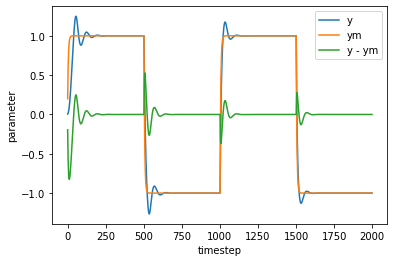

In [48]:
plt.plot(tc[start_idx:end_idx], y_list[start_idx:end_idx], label = "y")
plt.plot(tc[start_idx:end_idx], ym_list[start_idx:end_idx], label = "ym")
plt.plot(tc[start_idx:end_idx], error_list[start_idx:end_idx], label = "y - ym")
plt.xlabel("timestep")
plt.ylabel("parameter")
plt.legend()